# Stock Price Prediction

### Importing Libraries

In [24]:
import investpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
import math 

# Stock Price Visualization


## Displaying the data that will be extracted using INVESTPY

In [25]:
df = investpy.get_stock_historical_data(stock='AMZN',
                                        country='United States',
                                        from_date='01/01/2010',
                                        to_date='31/12/2020',
                                        order = 'asc')
print(df.tail())

              Open     High      Low    Close   Volume Currency
Date                                                           
2020-12-24  3193.9  3202.00  3169.00  3172.69  1451917      USD
2020-12-28  3192.9  3303.55  3173.08  3283.96  5686787      USD
2020-12-29  3311.0  3350.00  3282.54  3322.00  4872933      USD
2020-12-30  3340.0  3341.13  3283.00  3285.85  3209310      USD
2020-12-31  3275.0  3282.92  3241.20  3256.93  2957206      USD


In [26]:
df.shape   #shapr of dataset

(2770, 6)

### Visulaization using Matplotlib

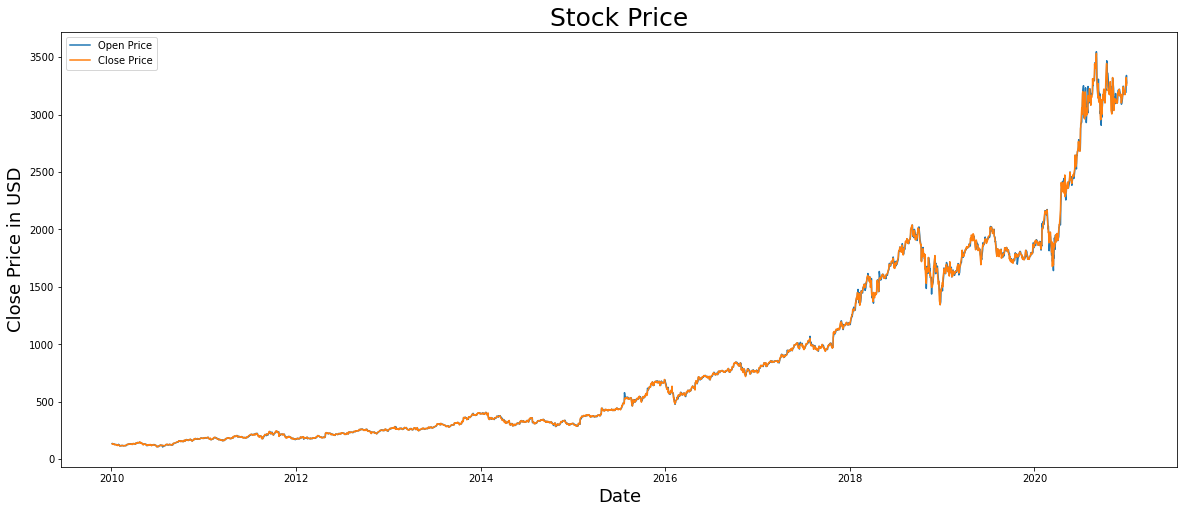

In [27]:
df2 = df.copy() # copied df data to df2
# Graph ploted for open price and close price
plt.figure(figsize=(20,8))
plt.title('Stock Price',fontsize = 25)
plt.plot(df2['Open'],label = 'Open Price')
plt.plot(df2['Close'],label = 'Close Price')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price in USD',fontsize = 18)
plt.legend()
plt.show()

### Droping all column leaving Close price column

In [28]:
df2.drop(columns=['Open', 'High','Low', 'Volume', 'Currency'], inplace=True)
df2

,Close
Date,
2010-01-04,133.90
2010-01-05,134.69
2010-01-06,132.25
2010-01-07,130.00
2010-01-08,133.52
...,...
2020-12-24,3172.69
2020-12-28,3283.96
2020-12-29,3322.00


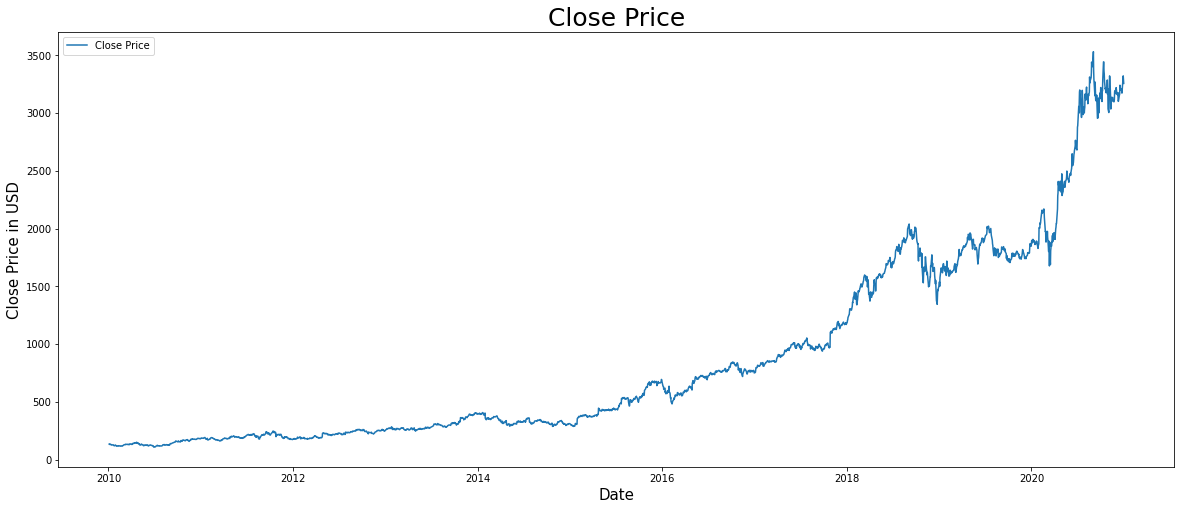

In [29]:
# Graph ploted for only Close price 
plt.figure(figsize=(20,8))
plt.title('Close Price',fontsize = 25)
plt.plot(df2['Close'],label = 'Close Price')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Close Price in USD',fontsize = 15)
plt.legend()
plt.show()

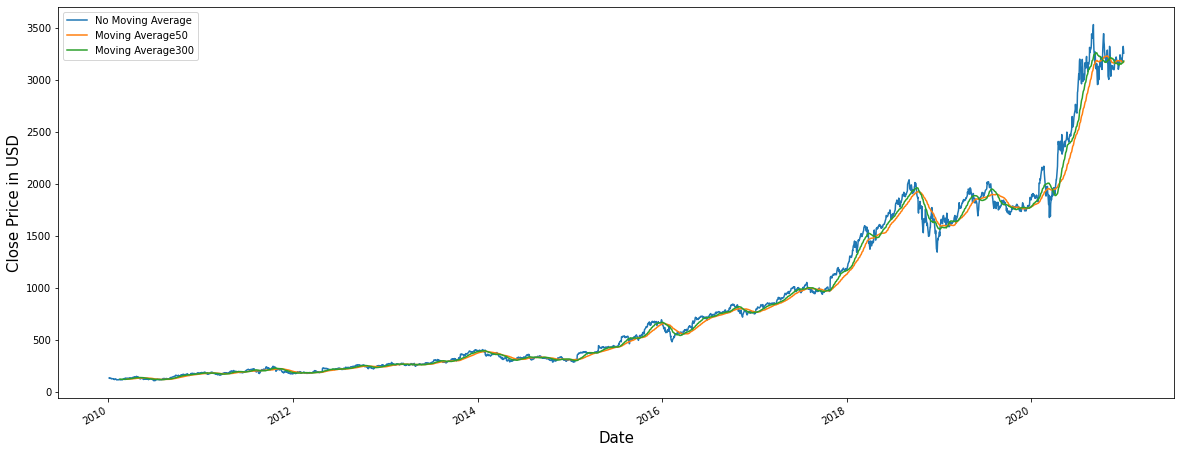

In [30]:
#MOVING AVERAGE Visualization (MA)
#value given is the size of window in which we will smothen it.
df2['Close'].plot(label = 'No Moving Average',figsize=(20,8))
df2['Moving Average50'] = df2['Close'].rolling(50).mean()
df2['Moving Average50'].plot(label = 'Moving Average50')
df2['Moving Average300'] = df2['Close'].rolling(30).mean()
df2['Moving Average300'].plot(label = 'Moving Average300')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Close Price in USD',fontsize = 15)
plt.legend()

# Stock Price Model

In [31]:
data=df.filter(['Close'])
dataset = data.values
len(dataset)

2770

In [32]:
training_data_size = math.ceil(len(dataset)*0.7)
training_data_size

1939

## Useing MinMaxScaler 

In [33]:
# Normalizing my data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0073886 ],
       [0.0076194 ],
       [0.00690655],
       ...,
       [0.93880812],
       [0.92824672],
       [0.91979759]])

In [34]:
# For training data
train_data = scaled_data[0:training_data_size, :]
x_train = []  #independence varaible
y_train = []  # dependenet variable or target variable

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633976, 0.00547499, 0.00598918, 0.00547499, 0.00541363,
       0.00555095, 0.0050163 , 0.00526171, 0.00374543, 0.00341821,
       0.00317573, 0.00413107, 0.00508934, 0.0049082 , 0.00299751,
       0.00277839, 0.00306471, 0.0021415 , 0.00256512, 0.00240151,
       0.0027521 , 0.00255636, 0.00335394, 0.00322831, 0.00260602,
       0.00224959, 0.00276671, 0.0026031 , 0.00274626, 0.0025213 ,
       0.00324584, 0.00280177, 0.0028602 , 0.00465403, 0.00494326,
       0.00504844, 0.00581973, 0.00593075, 0.00628133, 0.00590445,
       0.0063982 , 0.00729511, 0.00678092, 0.00657933, 0.00677215,
       0.00664068, 0.00705554, 0.00635145, 0.00638651, 0.006033  ,
       0.00567657, 0.00763109, 0.0077275 , 0.00774503, 0.00817158])]
[0.007934931226700644]
[array([0.0073886 , 0.0076194 , 0.00690655, 0.0062492 , 0.00727758,
       0.00633976, 0.00547499, 0.00598918, 0.00547499, 0.00541363,
       0.00555095, 0.0050163 , 0.00

In [35]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1879, 60, 1)

## Building LSTM Prediction Model 

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
59/59 [==============================] - 4s 11ms/step - loss: 0.0035
Epoch 2/200
59/59 [==============================] - 1s 9ms/step - loss: 2.0917e-04
Epoch 3/200
59/59 [==============================] - 1s 9ms/step - loss: 1.7357e-04
Epoch 4/200
59/59 [==============================] - 1s 10ms/step - loss: 1.4300e-04
Epoch 5/200
59/59 [==============================] - 1s 9ms/step - loss: 1.6369e-04
Epoch 6/200
59/59 [==============================] - 1s 9ms/step - loss: 1.1848e-04
Epoch 7/200
59/59 [==============================] - 1s 10ms/step - loss: 1.2335e-04
Epoch 8/200
59/59 [==============================] - 1s 10ms/step - loss: 2.4012e-04
Epoch 9/200
59/59 [==============================] - 1s 10ms/step - loss: 1.4743e-04
Epoch 10/200
59/59 [==============================] - 1s 9ms/step - loss: 1.1086e-04
Epoch 11/200
59/59 [==============================] - 1s 10ms/step - loss: 9.2622e-05
Epoch 12/200
59/59 [==============================] - 1s 9ms/step - loss

In [39]:
test_data = investpy.get_stock_historical_data(stock='AMZN',
                                        country='United States',
                                        from_date='31/12/2019',
                                        to_date='31/12/2020',
                                        order = 'asc')
                                        

In [40]:
# FOr testing data 
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [41]:
# Using reshape
x_test = np.array(x_test)
# Again reshaping to give its actual size
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
root_mean_square_error = np.sqrt(np.mean(predictions- y_test)**2)
root_mean_square_error

400.7492857021144

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


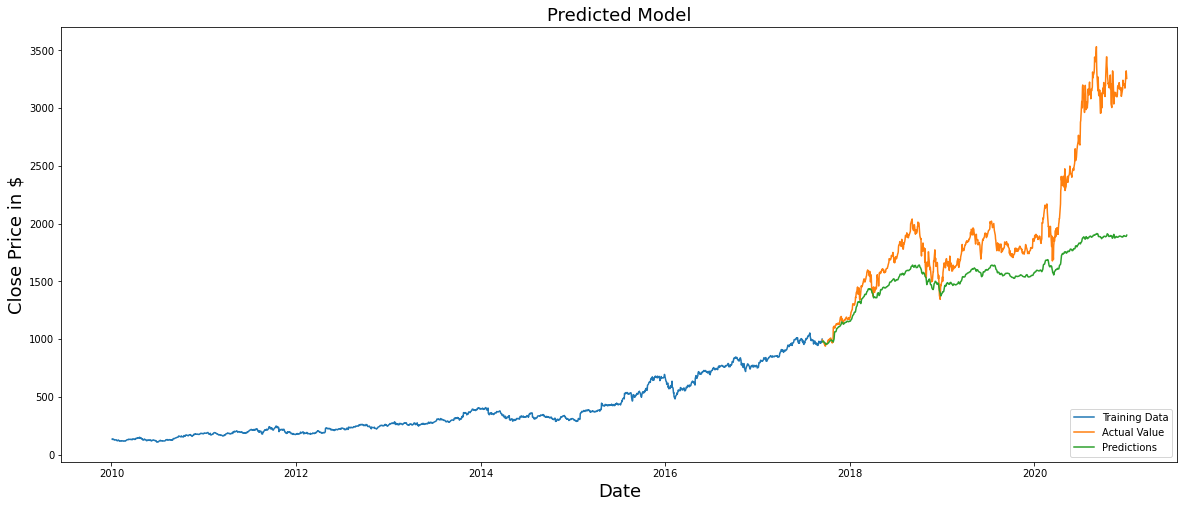

In [44]:

train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Predicted Model', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Training Data', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [45]:
valid.head()

,Close,predictions
Date,,
2017-09-14,992.21,976.380737
2017-09-15,986.79,981.196960
2017-09-18,974.19,982.574402
2017-09-19,969.86,979.600037
2017-09-20,973.21,974.808472


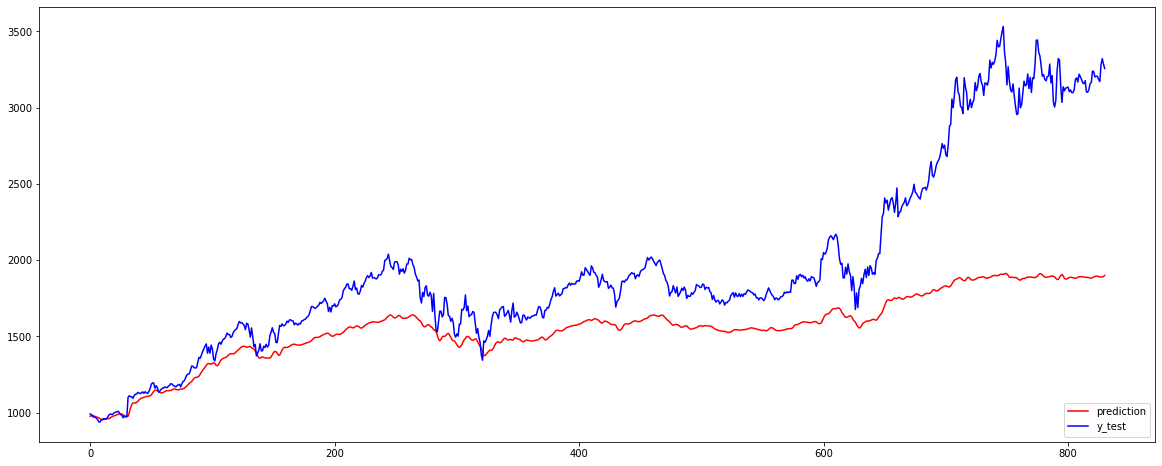

In [46]:
plt.figure(figsize=(20,8))
plt.plot(predictions,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='lower right')
plt.show()

# Conclution

It is impossible to get a model that can 99% predict the price without any error, there are too many factors can affect the stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.

Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure.